In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\Datascience\Dataset")

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.shape

(150, 6)

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.describe().style.background_gradient(cmap = 'cividis')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.describe().T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,25%,50%,75%,max
Id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
(data==0).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(data.isnull().sum() * 100 / len(data),2))

Checking Data has null values or not
Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [15]:
# Shallow Copy
df = data.copy()
df1 = data.copy()

In [16]:
# Seperating into numerical and categorical columns 
num = []
cat = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        cat.append(col)

print("Numerical columns:\n",num,'\n')
print("Categorical columns:\n",cat)

Numerical columns:
 ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 

Categorical columns:
 ['Species']


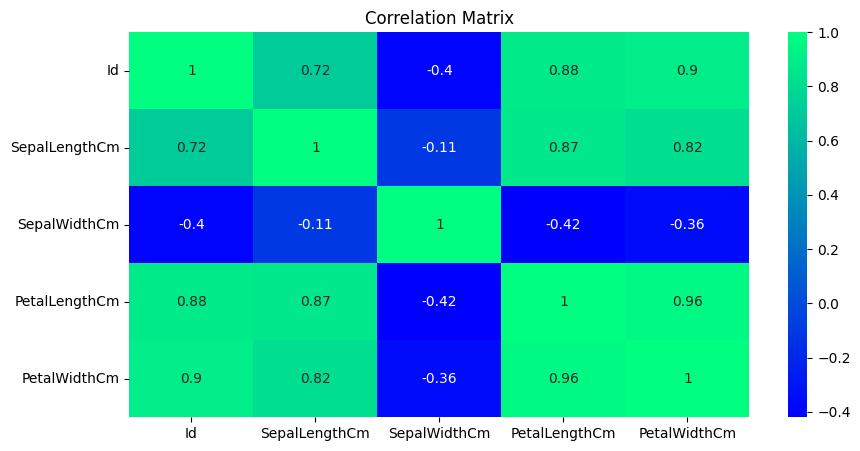

In [17]:
#Calculate the correlation Matrix
dt_col = data.select_dtypes(include = ['int64','float64']).corr()
#visualizing the correlation matrix using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(dt_col,annot=True,cmap='winter')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x1000 with 0 Axes>

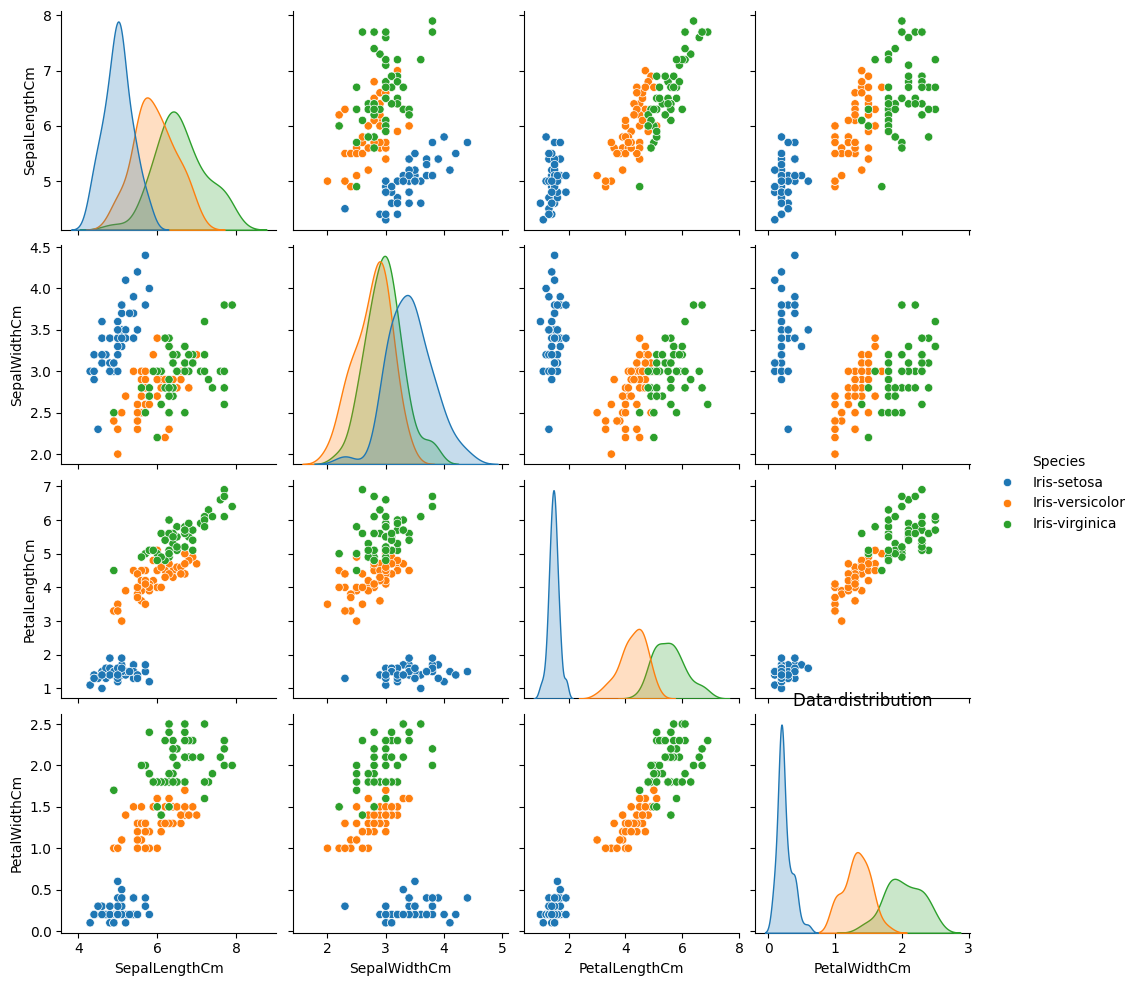

In [18]:
# Data distribution
plt.figure(figsize=(10,10))
sns.pairplot(data.drop(['Id'],axis=1), hue = 'Species')
plt.title('Data distribution')
plt.show()

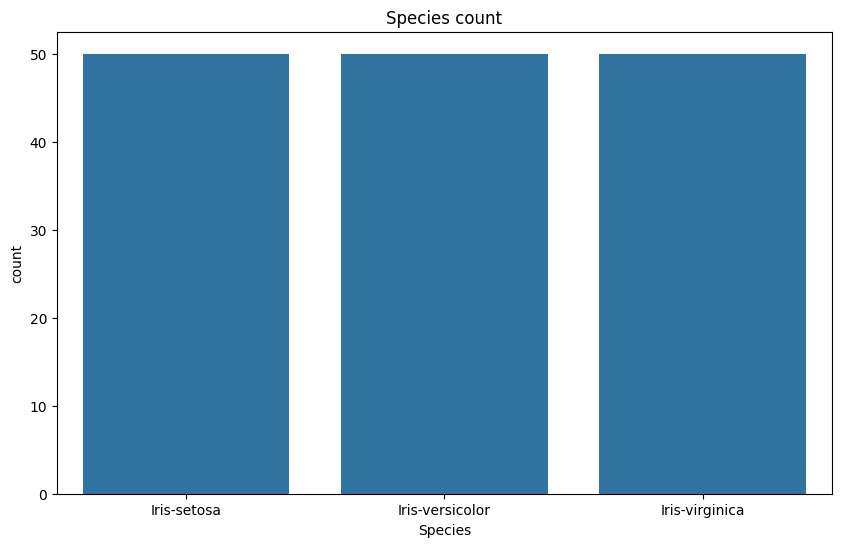

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Species', data = data)
plt.title("Species count")
plt.show()

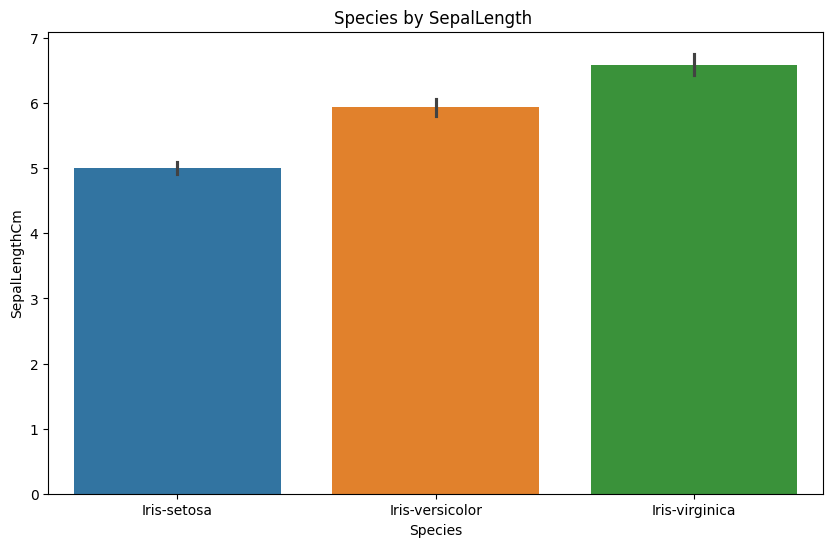

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Species', y = 'SepalLengthCm', hue = 'Species', data = data)
plt.title("Species by SepalLength ")
plt.show()

In [21]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

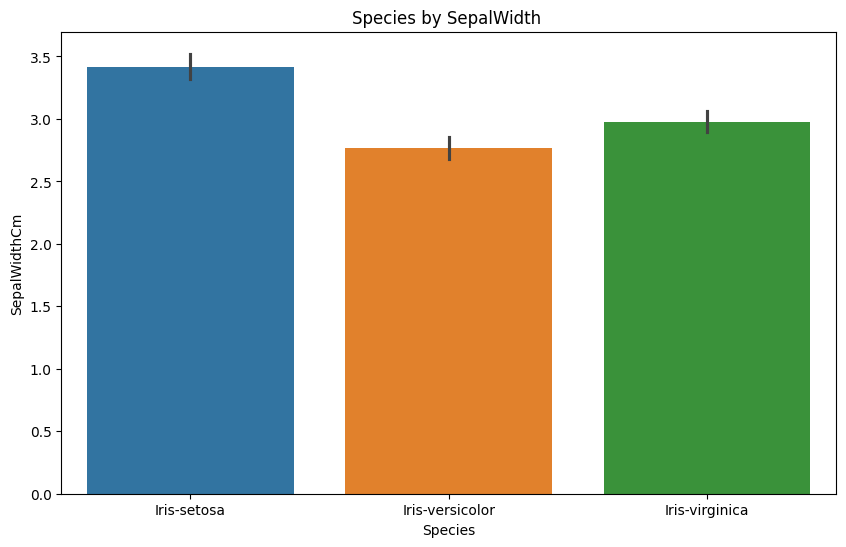

In [22]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Species', y = 'SepalWidthCm', hue = 'Species', data = data)
plt.title("Species by SepalWidth ")
plt.show()

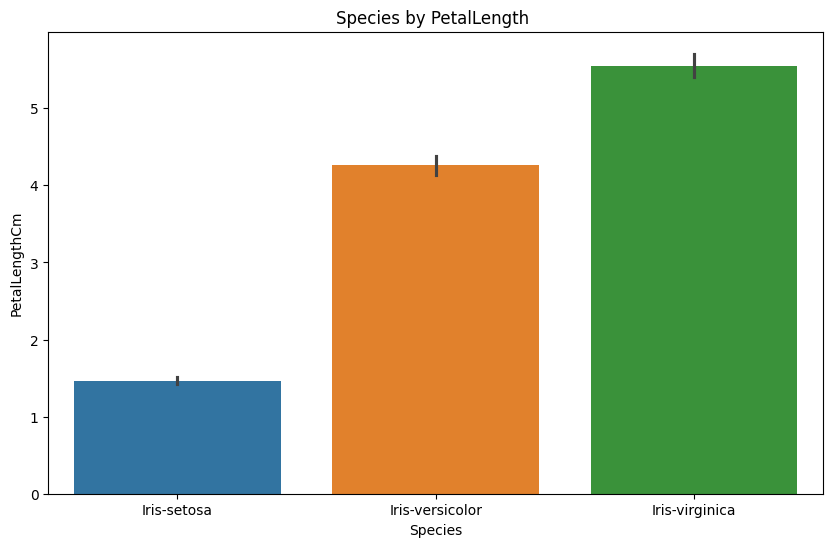

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Species', y = 'PetalLengthCm', hue = 'Species', data = data)
plt.title("Species by PetalLength ")
plt.show()

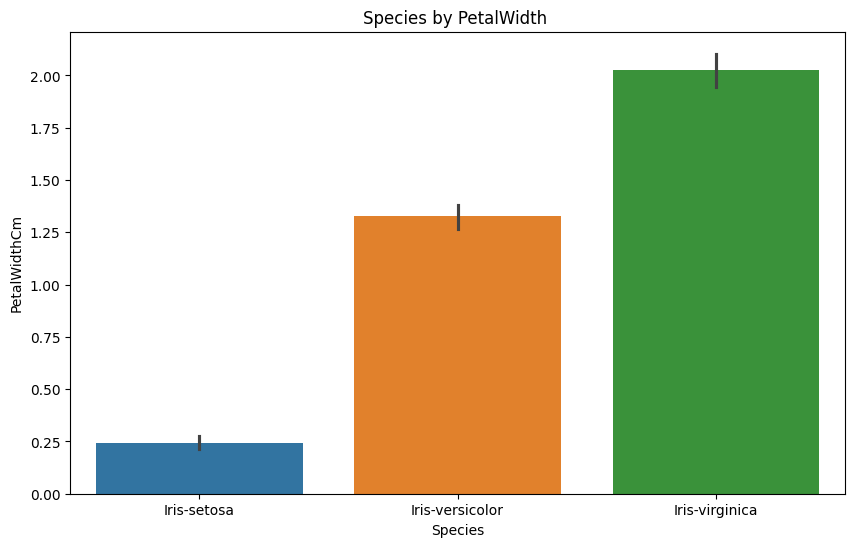

In [24]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Species', y = 'PetalWidthCm', hue = 'Species', data = data)
plt.title("Species by PetalWidth ")
plt.show()

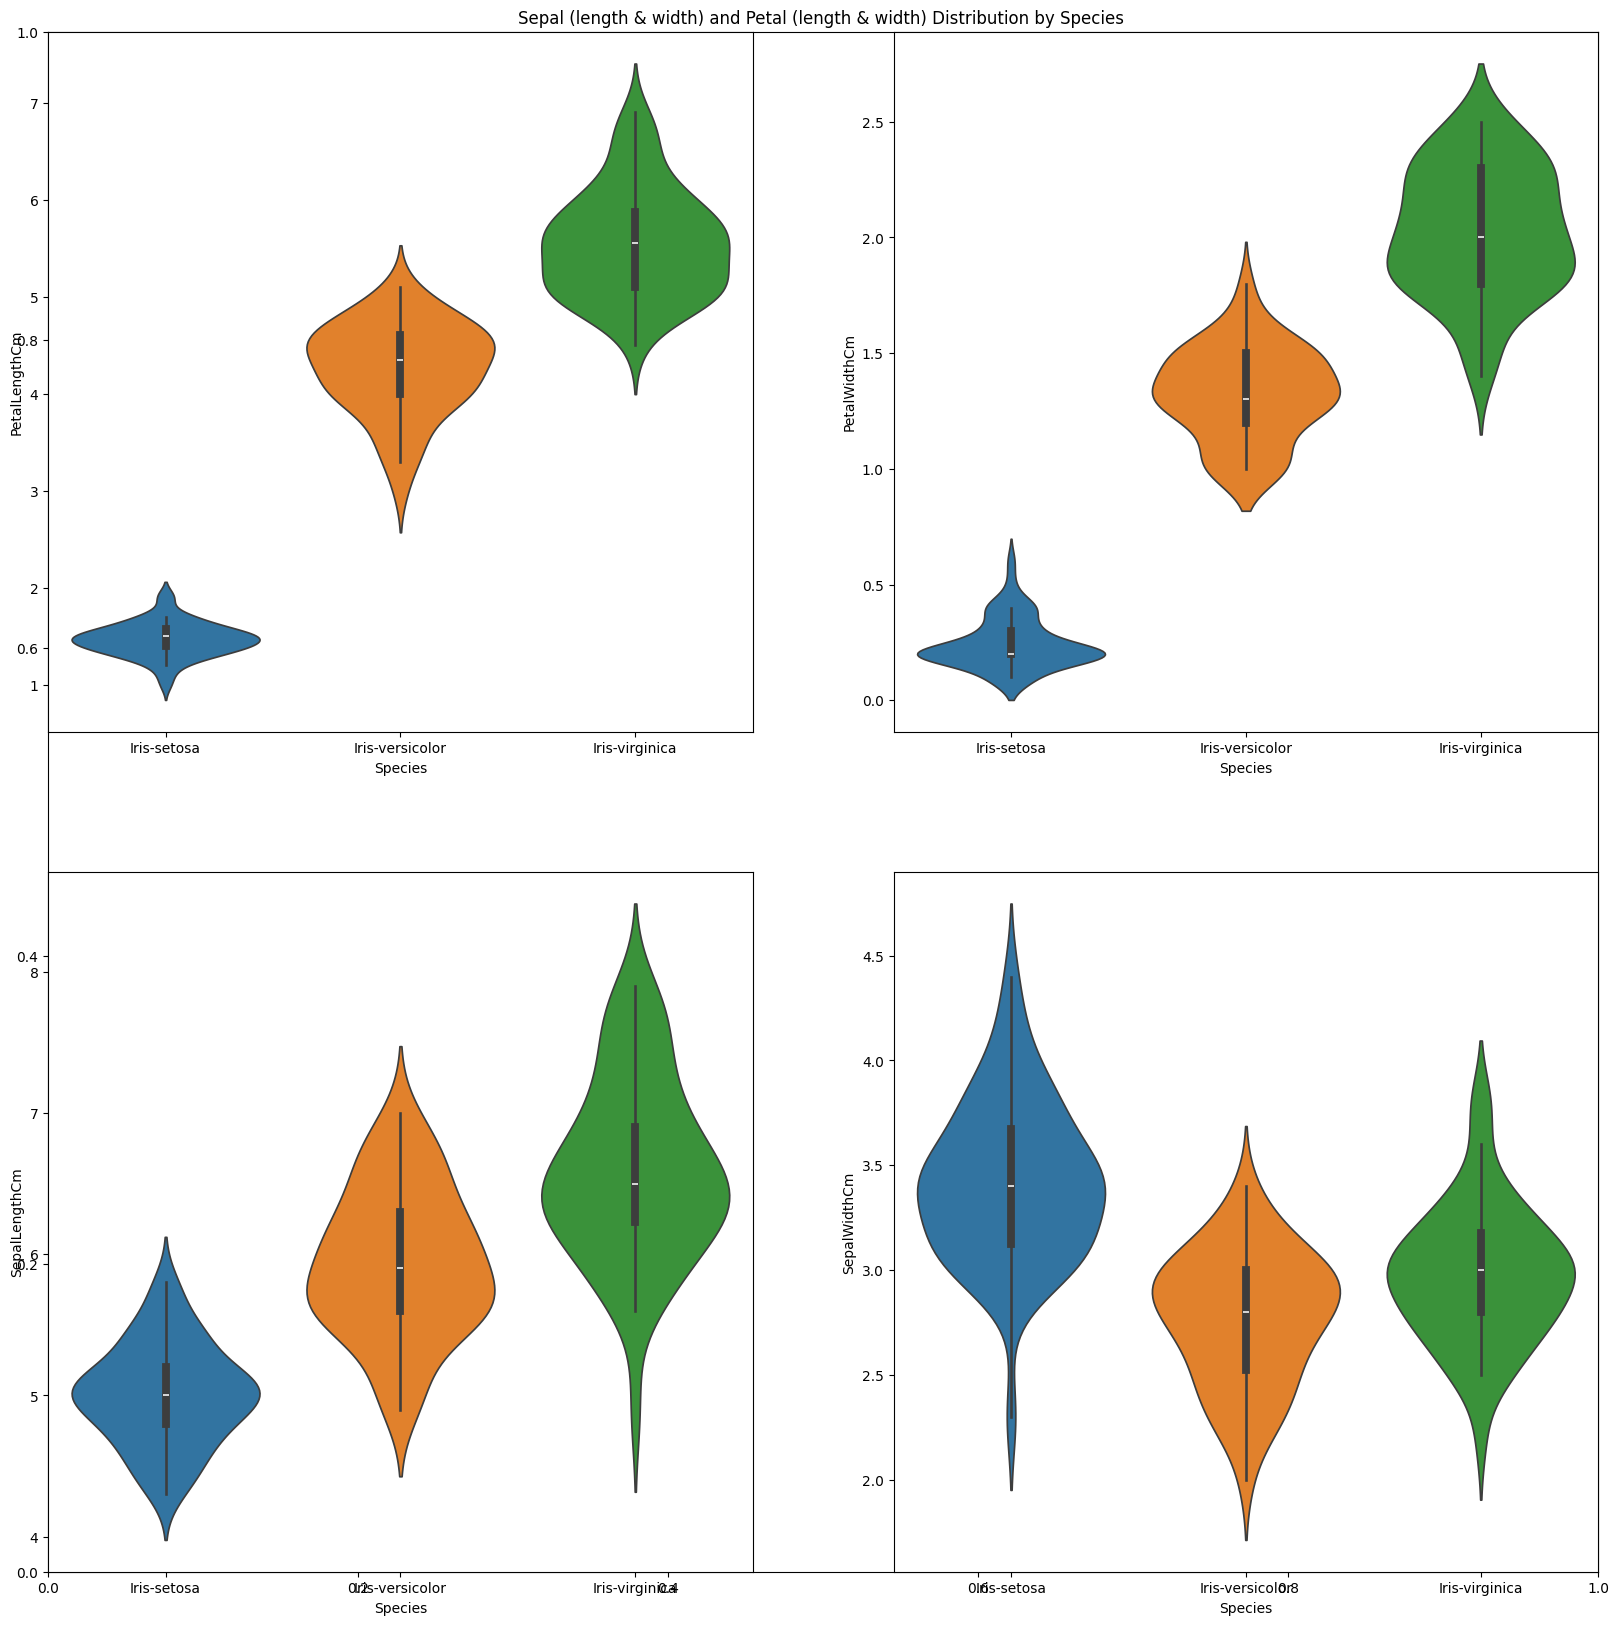

In [25]:
plt.figure(figsize=(20,20))
plt.title('Sepal (length & width) and Petal (length & width) Distribution by Species ')
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df, hue = 'Species')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df, hue = 'Species')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df, hue = 'Species')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df, hue = 'Species')
plt.show()

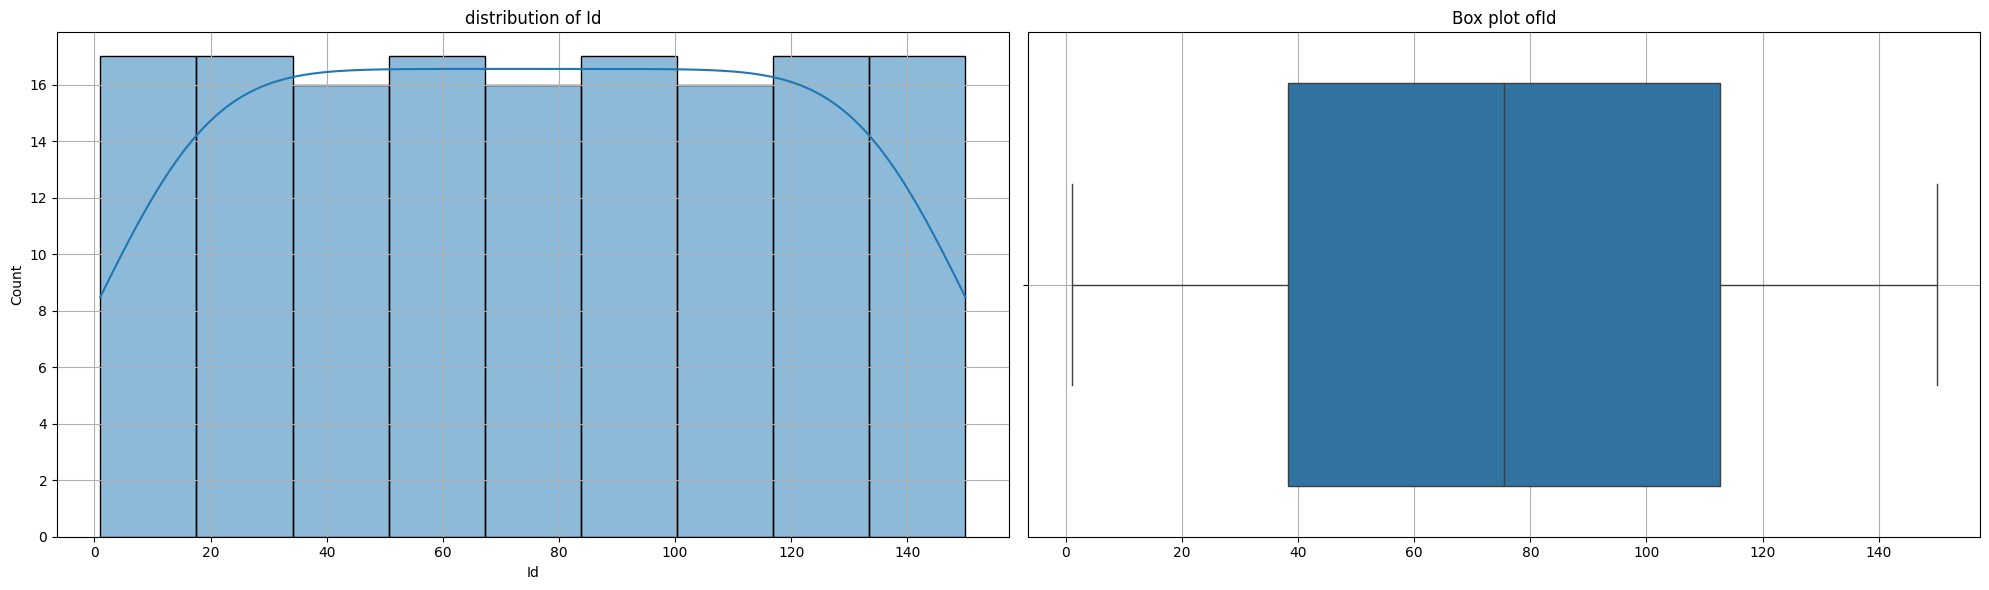

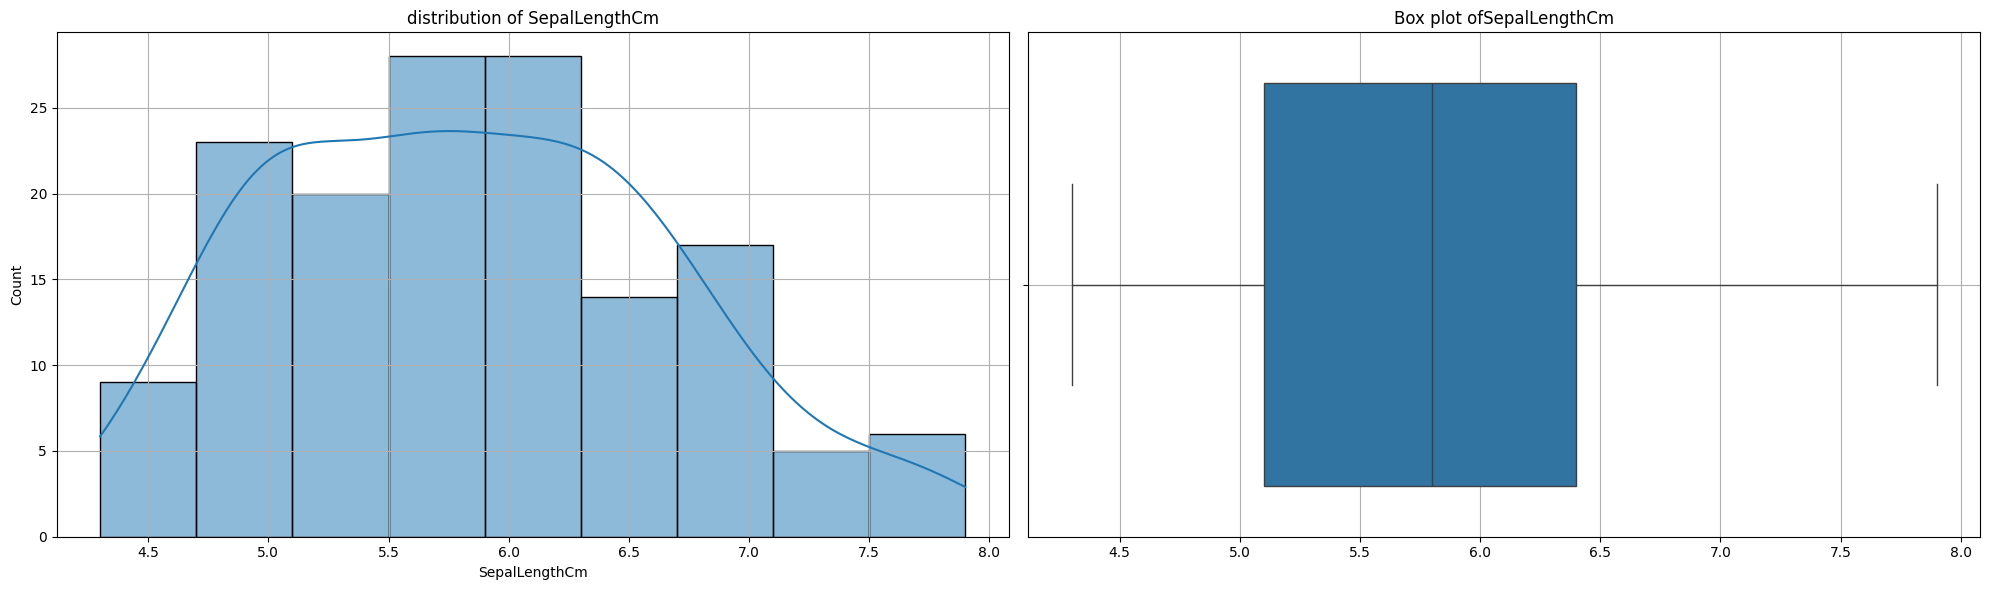

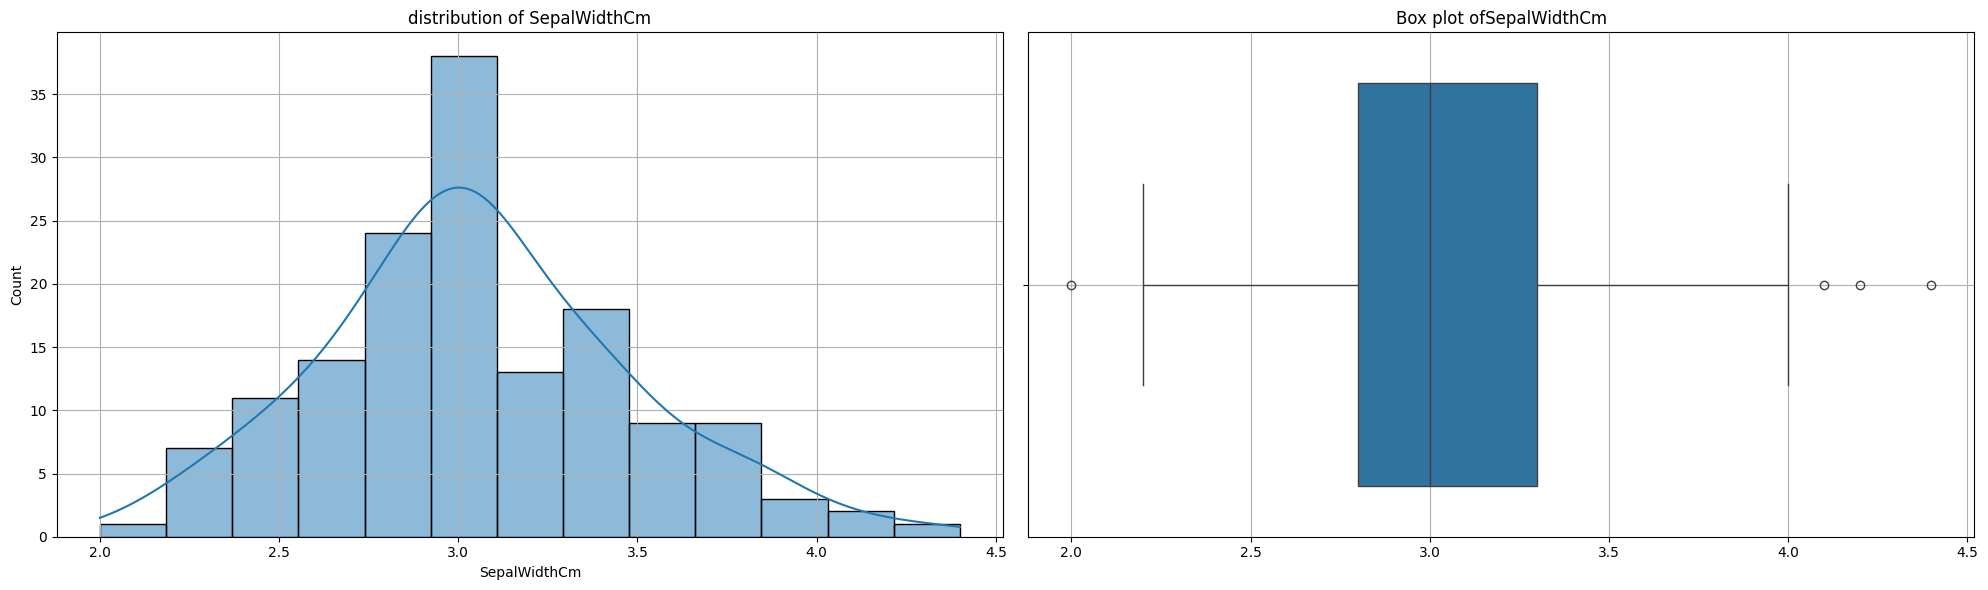

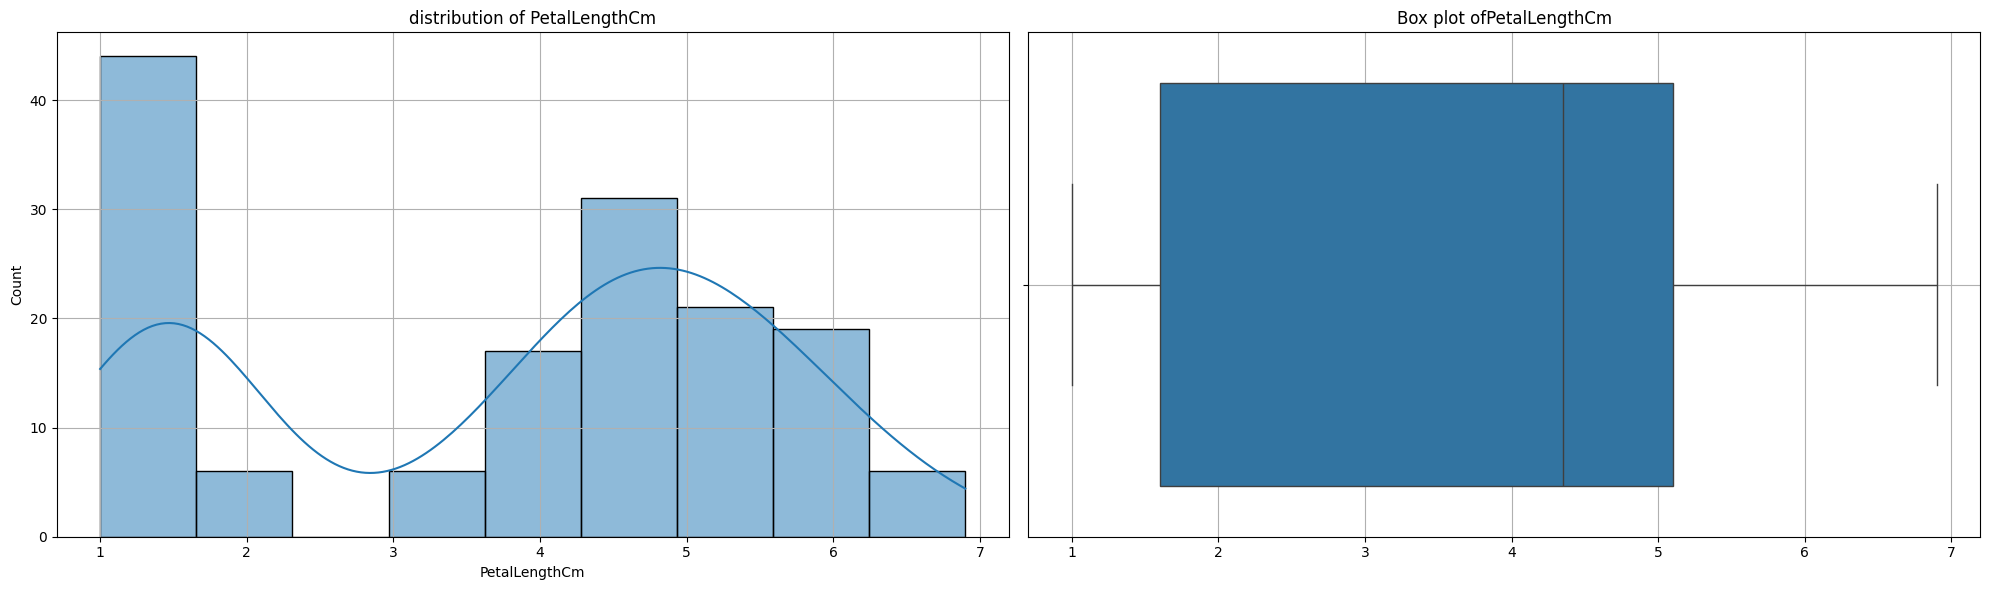

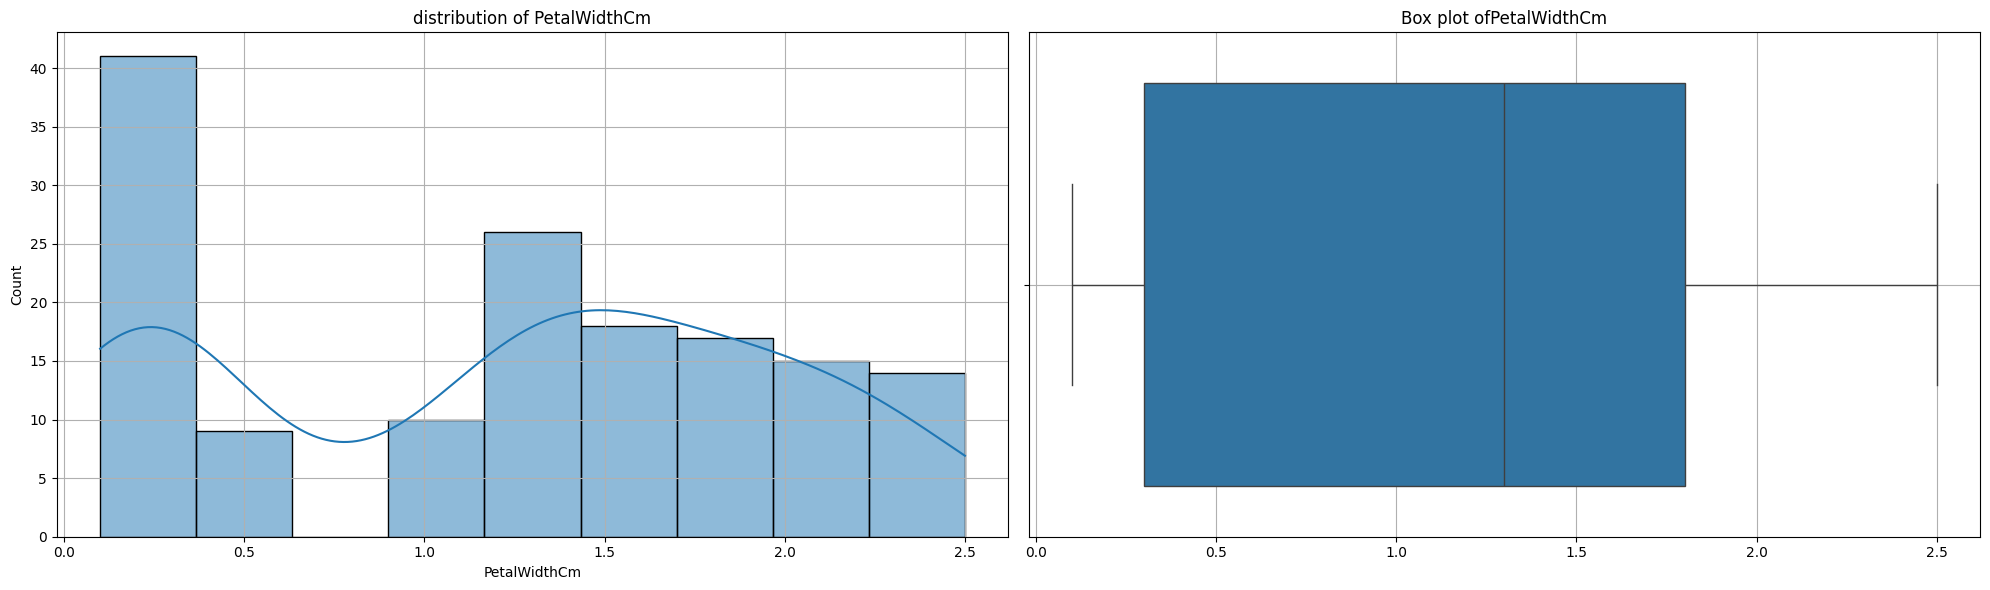

In [26]:
# Anlaysing the numerical columns 
# Checking for the outliers.

for i in num:
    fig,axes = plt.subplots(1,2,figsize = (20,6))

    sns.histplot(df[i],kde = True, ax=axes[0])
    axes[0].set_title(f'distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')
    
    sns.boxplot(x= df[i],ax = axes[1])
    axes[1].set_title(f'Box plot of{i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

- There are no data points plotted outside the whiskers in the box plot. This suggests that there are no outliers in the sepal width data.
- The histogram also doesn't show any clear evidence of outliers. It has a roughly symmetrical, bell-shaped distribution, with no bars standing out significantly from the others.

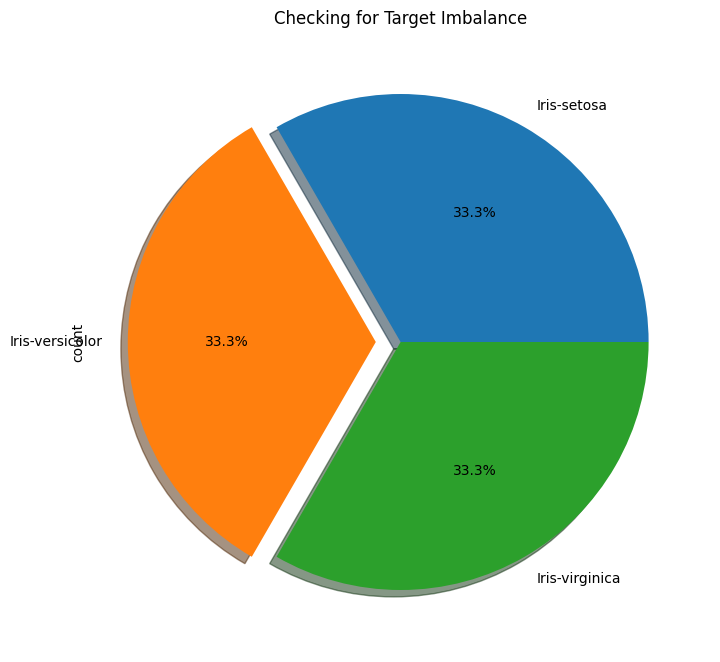

In [27]:
# Checking target Imbalance
plt.figure(figsize=(8,12))
data.Species.value_counts().plot.pie(explode=[0,0.1,0], autopct ='%1.1f%%', shadow = True)
plt.title('Checking for Target Imbalance')
plt.show()

- **The target is perfectly Balanced**

In [28]:
# X, Y split
X = data.drop(['Id','Species'],axis = 1)
y = data['Species']

In [29]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

In [30]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=421)

# **Model Building**

# K-Nearest Neighbour (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

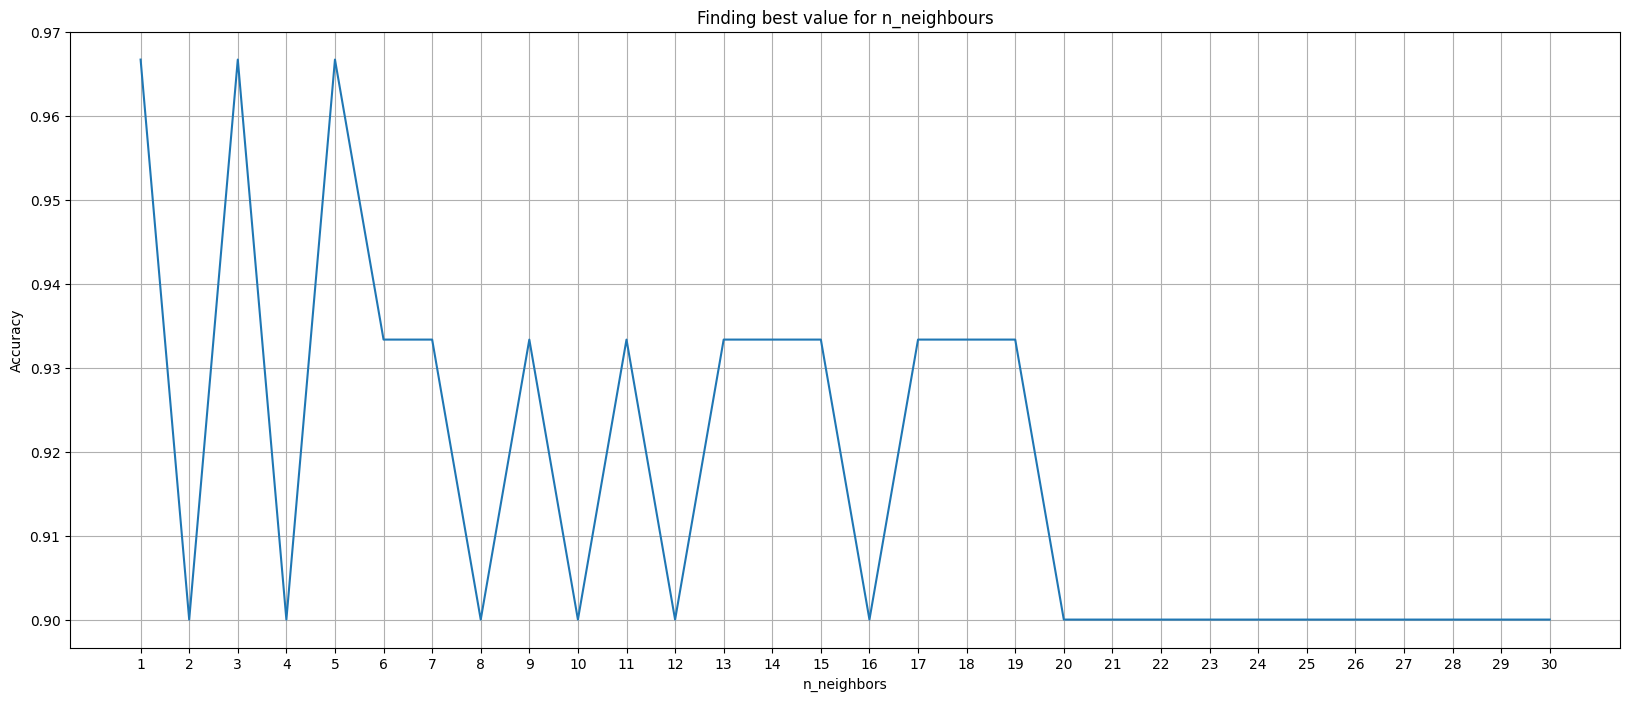

Highest value:  0.9666666666666667


In [33]:
#Finding best value for n_neighbours
x_axis = list(range(1, 31))
accuracy_values = [] # Use a list to store accuracy values

for i in x_axis:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(x_test)
    accuracy = accuracy_score(prediction, y_test)
    accuracy_values.append(accuracy)

acc = pd.Series(accuracy_values, index=x_axis) # Convert the list to a Pandas Series
plt.figure(figsize=(20,8))
plt.plot(x_axis, acc)
plt.xticks(x_axis)
plt.title("Finding best value for n_neighbours")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest value: ', acc.max())

In [34]:
# K - nearest algorithm
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')

In [35]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
pred_knn = knn.predict(x_test)

In [37]:
knn_acc = accuracy_score(pred_knn,y_test)
knn_acc

0.9666666666666667

In [38]:
print('KNN Accuracy Score:', round(knn_acc*100))

KNN Accuracy Score: 97


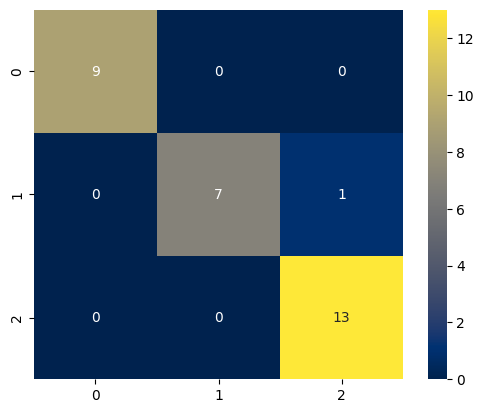

In [39]:
# Confusion Matrix
cm = confusion_matrix(pred_knn,y_test)
sns.heatmap(cm, annot = True,fmt='d', cmap = 'cividis', square = True, annot_kws={'size': 10})
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [40]:
#Classification Report
cls_rep_knn = classification_report(pred_knn,y_test)
print('Classification Report:\n----------------------')
print(cls_rep_knn)

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Support Vector Machine (SVM)

In [41]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C = 1.0, random_state = 10)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=10)

In [42]:
pred_svm = svm.predict(x_test)

In [43]:
svm_acc = accuracy_score(pred_svm,y_test)
svm_acc

0.9666666666666667

In [44]:
print('SVM Accuracy Score:', round(svm_acc*100))

SVM Accuracy Score: 97


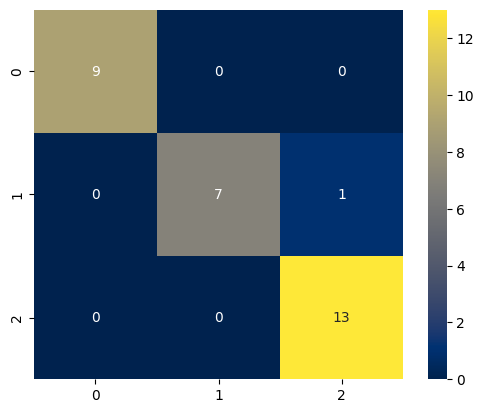

In [45]:
#Confusion Matrix
cm = confusion_matrix(pred_svm,y_test)
sns.heatmap(cm, annot = True,fmt='d', cmap = 'cividis', square = True, annot_kws={'size': 10})
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [46]:
#Classification Report
cls_rep_svm = classification_report(pred_svm,y_test)
print('Classification Report:\n----------------------')
print(cls_rep_svm)

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [48]:
pred_lr = lr.predict(x_test)

In [49]:
lr_acc = accuracy_score(pred_lr,y_test)
lr_acc

0.9666666666666667

In [50]:
print('Logistic Regression Accuracy Score:', round(lr_acc*100))

Logistic Regression Accuracy Score: 97


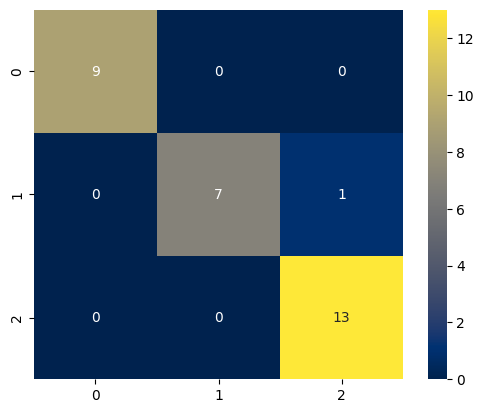

In [51]:
#Confusion Matrix
cm = confusion_matrix(pred_lr,y_test)
sns.heatmap(cm, annot = True,fmt='d', cmap = 'cividis', square = True, annot_kws={'size': 10})
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [52]:
#Classification Report
cls_rep_lr = classification_report(pred_lr,y_test)
print('Classification Report:\n----------------------')
print(cls_rep_lr)

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 11)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

In [60]:
pred_dtc = dtc.predict(x_test)

In [61]:
dtc_acc = accuracy_score(pred_dtc,y_test)
dtc_acc

1.0

In [63]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dtc = cross_val_score(dtc, X, y, cv=30)
accuracy = np.mean(cv_scores_dtc)
print("Cross-Validation Scores:", cv_scores_dtc)
print("Mean Accuracy:", accuracy)

Cross-Validation Scores: [1.  1.  1.  1.  1.  1.  0.8 1.  1.  1.  0.8 1.  0.8 1.  0.8 1.  1.  0.8
 1.  0.8 1.  0.8 1.  1.  0.8 1.  1.  1.  1.  1. ]
Mean Accuracy: 0.9466666666666667


# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [67]:
pred_rfc = rfc.predict(x_test)

In [68]:
rfc_acc = accuracy_score(pred_rfc,y_test)
rfc_acc

0.9666666666666667

In [69]:
print('Random Forest Classifier Accuracy Score:', round(lr_acc*100))

Random Forest Classifier Accuracy Score: 97


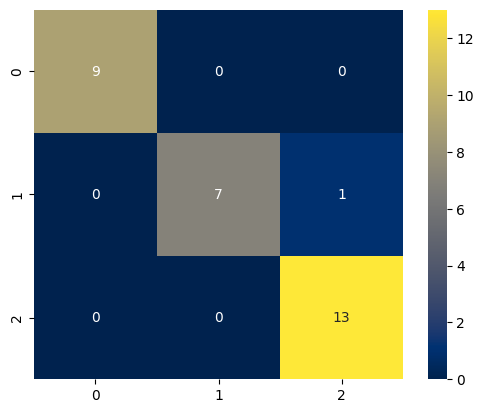

In [70]:
#Confusion Matrix
cm = confusion_matrix(pred_rfc,y_test)
sns.heatmap(cm, annot = True,fmt='d', cmap = 'cividis', square = True, annot_kws={'size': 10})
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [71]:
#Classification Report
cls_rep_rfc = classification_report(pred_rfc,y_test)
print('Classification Report:\n----------------------')
print(cls_rep_rfc)

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Navie Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [54]:
pred_nb = nb.predict(x_test)

In [55]:
nb_acc = accuracy_score(pred_nb,y_test)
nb_acc

1.0

In [62]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(nb, X, y, cv=30)
accuracy = np.mean(cv_scores)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", accuracy)

Cross-Validation Scores: [1.  0.8 1.  1.  1.  1.  0.8 1.  1.  1.  0.8 1.  1.  1.  0.8 1.  1.  0.8
 1.  1.  1.  0.8 0.8 1.  1.  1.  1.  1.  1.  1. ]
Mean Accuracy: 0.9533333333333333


KNN, SVM , Logistic Resgression, Random forest classifier, These algorithms are given an accuracy of 97 for IRIS Prediction